In [1]:
# import libraries
import pandas as pd
import numpy as np

The main objective of this project is to create **a movie recommendation system** based on the TMDb dataset(The Movie Database), which is a comprehensive movie database that provides information about movies, including details like titles, ratings, release dates, revenue, genres, and much more.
<br><br>The original dataset can be found here https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies/data
<br>It contains real-time movie information and updated to include movies in 2024.

This recommendation system suggests similar movies based on the ***similarity*** between each movie, based on genres, keywords, ratings, language etc.

## Data Exploration

In [2]:
# load dataset
df = pd.read_csv('/kaggle/input/tmdb-movies-dataset-2023-930k-movies/TMDB_movie_dataset_v11.csv')

In [4]:
# display all columns & the head rows of the dataset
pd.set_option('display.max_columns', None)
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192353 entries, 0 to 1192352
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1192353 non-null  int64  
 1   title                 1192340 non-null  object 
 2   vote_average          1192353 non-null  float64
 3   vote_count            1192353 non-null  int64  
 4   status                1192353 non-null  object 
 5   release_date          981369 non-null   object 
 6   revenue               1192353 non-null  int64  
 7   runtime               1192353 non-null  int64  
 8   adult                 1192353 non-null  bool   
 9   backdrop_path         312422 non-null   object 
 10  budget                1192353 non-null  int64  
 11  homepage              125531 non-null   object 
 12  imdb_id               615899 non-null   object 
 13  original_language     1192353 non-null  object 
 14  original_title        1192340 non-

There are over 1 million records of movies in our dataset, 23 attributes are documented, including title, vote counts, revenue, etc.
<br>Most columns are in object format(conversion needed), and **key features** include:
1. **movie itself**: id, title, genres, runtime, adult, original language, keywords, release year...
2. **rating & popularity**: vote counts, popularity...
3. **profitability**: revenue, budget, production companies & countries...

Since the stakeholder of our recommendatoion system is audiences instead of investors, thus our model is not concerned about the profitability, so **columns such as revenue, budgets, should be removed during data preprocessing stage**.

In [7]:
# check for any missing values
df.isnull().sum()

id                            0
title                        13
vote_average                  0
vote_count                    0
status                        0
release_date             210984
revenue                       0
runtime                       0
adult                         0
backdrop_path            879931
budget                        0
homepage                1066822
imdb_id                  576454
original_language             0
original_title               13
overview                 249294
popularity                    0
poster_path              386887
tagline                 1025351
genres                   488074
production_companies     660187
production_countries     539434
spoken_languages         519029
keywords                 875996
dtype: int64

Notied there are significant amount of missing values in columns such as backdrop paths, homepage, poster_path...Since these information are irrelevant to our model building, it is safe to ignore. 
<br>
<br>However, **release_date** (17% missing) and **genres** (40% missing) are essential to our model development, so **new method should be implemented to solve this issue during data preprocessing stage**.

In [ ]:
# check for any duplicates
df.duplicated().sum()

In [5]:
# relatively small numbers of duplicates, just drop them
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## Content-based Filtering

Content-based filtering uses item features to recommend other items similar to what the user likes, based on their previous actions or explicit feedback.<br><br>
In this case, I will focus on the **intrinsic attributes** of movies in our dataset, which include title, release date, runtime, adult, original language and genres. I will **extract relevant information**, **binary-encode each feature** and **vectorize each data entry**, so that I can **calculate the cosine similarity** between each movie for recommendation.


## Feature Selection

In [ ]:
df['title'].isnull().sum()

In [6]:
df = df[~df['title'].isnull()]

In [7]:
df['title'].isnull().sum()

0

In [7]:
df = df[~df['genres'].isnull()]

In [8]:
df['genres'].isnull().sum()

0

In [9]:
df['title'] = df['title'].str.strip().str.lower().str.replace(r'\s+', ' ', regex=True)
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,the dark knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,the avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [10]:
# convert release_date to datetime and extract year
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].dt.year.value_counts().sort_index()

release_date
1800.0     1
1865.0     2
1874.0     1
1878.0    29
1882.0     1
          ..
2061.0     1
2069.0     1
2074.0     1
2085.0     1
2099.0     1
Name: count, Length: 161, dtype: int64

Noticed some years are wayyyy off the normal timeline, since the first movie ever released is in 1895, and the latest movie in this databse should be releaed in 2024.

In [ ]:
# view the rows with release years before 1900
df[df['release_date'].dt.year < 1900].sort_values('release_date')

In [22]:
# view the rows with release years after 2024
df[df['release_date'].dt.year == 2025].sort_values('release_date', ascending=False)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
370834,1428525,francis,0.0,0,In Production,2025-12-31,0,15,False,NaN,...,Francis,Based loosely on the life of Saint Francis of ...,1.212,NaN,All we need is bread and water,Drama,Negativa Productions,NaN,English,NaN
721738,1380633,the edge of existence,0.0,0,In Production,2025-12-31,0,87,False,NaN,...,The Edge of Existence,"Electronics lecturer, Cam Cameron, attempts to...",1.199,NaN,"Electronics lecturer, Cam Cameron, attempts to...",Documentary,NaN,NaN,NaN,NaN
689018,1186135,literally slay!,0.0,0,Planned,2025-12-31,0,0,False,NaN,...,Literally Slay!,"A Grooks Spinoff series starring Angela Smith,...",0.616,NaN,Literally Slay!,"Comedy, Horror",Lausey Films,NaN,English,NaN
411911,1410309,prove it!,0.0,0,In Production,2025-12-31,0,0,False,NaN,...,Prove It!,NaN,0.600,/mswEm246IOTNzY3IUt8t3Y5F9DH.jpg,NaN,"Romance, Animation",GAFG Studio,NaN,Turkish,"prove it!, prove"
387588,1412998,dogs,0.0,0,Planned,2025-12-31,0,0,False,/fMuC66aGHy7t5bHOZB46NLaTbx2.jpg,...,DOGS,"In DOGS, a young girl named Andy sets out to h...",0.600,/9N5Yd6mg8mTQ7GYCaNGTlfdGTm4.jpg,"When compassion gets cornered, who really wins?","Comedy, Drama","threesixty Productions, Renaissance Studio",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681029,1406579,guy on the outside,0.0,0,Released,2025-01-01,0,9,False,NaN,...,Guy on the Outside,"Plot Under Wraps, Releases Jan. 1, 2025.",0.000,NaN,What If You Just... Go Outside?,Comedy,Bob Bear Pictures,NaN,NaN,NaN
577776,1266839,thunderbolt fantasy: touri-ken yuuki saishuushou,0.0,0,In Production,2025-01-01,0,0,False,NaN,...,Thunderbolt Fantasy: Touri-ken Yuuki Saishuushou,Final conclusion to Thunderbolt fantasy,0.000,NaN,NaN,"Animation, Action, Fantasy",PiLi International Multimedia,NaN,Japanese,NaN
387462,1412451,real fake streets,0.0,0,Released,2025-01-01,0,86,False,NaN,...,Real Fake Streets,"For the past two months, we dedicated out live...",1.400,/71v5oGIO0L5aeZnKUXlgk7rbvn6.jpg,NaN,"Documentary, Drama",June 1st Films,NaN,NaN,"mockumentary, real, boxing, fake, rapper wanna..."
533129,1435330,take away,0.0,0,Released,2025-01-01,0,9,False,NaN,...,Take Away,We all fear being awakened by an unexpected ph...,1.326,NaN,NaN,Documentary,Big Whiskey Studios,United States of America,English,NaN


In [ ]:
df[df['release_date'].dt.year > 2024]['status'].value_counts()

Noticed movie records with a release year before 1900 are mostly scripts or plays (ex.A Farsa de Inês Pereira), which do not fall into the category under 'movie', thus they should be trimmed off.
<br><br>Also noticed movies with a release year after 2024 do not include any movie with a status of 'released', thus should be trimmed off as well, along with any movie that is not under the status of **'released'**

In [12]:
# drop any rows with release year smaller than 1900
df = df[df['release_date'].dt.year >= 1900]

# validate
df['release_date'].dt.year.value_counts().sort_index()

release_date
1900    202
1901    134
1902    118
1903    168
1904    155
       ... 
2061      1
2069      1
2074      1
2085      1
2099      1
Name: count, Length: 141, dtype: int64

In [ ]:
# check any status under the 'status' column
df['status'].value_counts()

any movie that is not under 'released' status is not available to watch, thus should be trimmed off

In [13]:
df = df[df['status'] == 'Released']
df['status'].value_counts()

status
Released    650494
Name: count, dtype: int64

Up unil now we still have 953k validate movie data in our databse, it is still a great resort.

In [ ]:
# check runtime of each movie in the dataset
df['runtime'].describe()

The minumum runtime is 0 and maxium is 14400, something is off.

In [ ]:
df['runtime'].value_counts().sort_index()

In [ ]:
df[df['runtime'] == 0].shape[0]

Noticed there are **208230 records** with 0 runtime, they must be removed.

In [ ]:
df[df['runtime'] <= 15].shape[0]

In [ ]:
df[df['runtime'] <= 15].head()

Some movies under 15 minutes are shorts (ex.frozen fever), they still fall under the definition of movie, but **they should be categorized as short during data preprocessing stage**.

In [ ]:
df[df['runtime']>= 360].shape[0]

In [ ]:
df[df['runtime']>= 360].sort_values('runtime', ascending=False).head()

Noticed there are **1595 records** with runtime greater than 360 minutes (any movie longer than 6 hours is not watchable, in my humble opinion), thus these records need to be trimmed off.

In [14]:
df=df[(df['runtime'] != 0) & (df['runtime'] <= 360)]
df['runtime'].describe()

count    528494.000000
mean         66.175200
std          44.825795
min           1.000000
25%          20.000000
50%          75.000000
75%          95.000000
max         360.000000
Name: runtime, dtype: float64

In [ ]:
df[df['runtime'] <= 5].sort_values('runtime').head()

Noticed some movies have zero revenue, even though this attribute is not relevant to our model building, this can be used to validate our data.

In [ ]:
df[df['revenue'] == 0].head()

Noticed many blockbuster hits(bird box, Zack Snyder's Justice League) are listed here, so there could be many errors in recording revenue, so we should proceed without trimming.

In [ ]:
df['genres'].head()

In [ ]:
df['tagline'].head()

In [ ]:
df['overview'].head()

In [ ]:
df['keywords'].head()

Noticed overview and tagline are equivalent to each other, and their main theme can be summarized by column 'genre', thus **these two columns can be dropped during data preprocessing stage.**
<br><br>Noticed many movies have comprehensive genres and keywords, and different combination can confuse the similarity between each pair, **more data processing is needed**.

What about production companies and languages? Are they comprehensive as well?

In [ ]:
df['production_countries'].value_counts()

In [ ]:
df['original_language'].value_counts().head(10)

In [ ]:
df.shape[0]

Noticed all records only have **one** original language, which can be used in model development, and majority(79%) of the movies in this dataset are in English, Japanese, French, Spanish, German, and Russia, and **these languages can be major categories during data preprocessing stage.**

In [ ]:
df['spoken_languages'].value_counts()

Noticed there are incidents with movies have multiple spoken languages, which can means this movie is available in multiple languages.<BR><BR>
However, no guarantee if the audiences will also see similarity between two movies in two different cultures but only available in the same translation , thus **this column will be removed during data preprocessing stage**.

In [ ]:
df['vote_average'].describe()

In [ ]:
df['vote_count'].describe()

In [ ]:
df['popularity'].describe()

Based on the stats summary of rating average and rating counts, there is very few information regarding popularity of each movie, as the 75% percentile of vote_counts is only 2, and median of the rating is 0-- **these columns will also be removed during data preprocessing stage**.

In [15]:
df= df[df['vote_count']>7]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87988 entries, 0 to 91265
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    87988 non-null  int64         
 1   title                 87988 non-null  object        
 2   vote_average          87988 non-null  float64       
 3   vote_count            87988 non-null  int64         
 4   status                87988 non-null  object        
 5   release_date          87988 non-null  datetime64[ns]
 6   revenue               87988 non-null  int64         
 7   runtime               87988 non-null  int64         
 8   adult                 87988 non-null  bool          
 9   backdrop_path         76681 non-null  object        
 10  budget                87988 non-null  int64         
 11  homepage              18004 non-null  object        
 12  imdb_id               87491 non-null  object        
 13  original_language    

In [16]:
df['popularity'].sort_values(ascending=False).head(10)

3873     2994.357
5049     2680.593
51367    2020.286
7919     1692.778
2131     1567.273
9946     1547.220
4019     1458.514
1110     1175.267
6397     1111.036
825      1069.340
Name: popularity, dtype: float64

In [17]:
import matplotlib.pyplot as plt

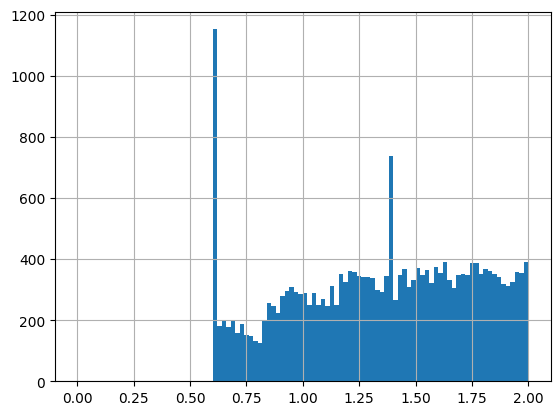

In [18]:
df['popularity'].hist(bins=100, range=(0,2))
plt.show()

Based on the distribution of populrity score, we can see there is a extreme skewness in lower socres, particularly between 0.5-0.75, whereas the max score can amount to almost 3000. The logic behind this popularity score is still unclear, and this scale of imbalance can largely affect the similarity result, as a result, **popularity should be removed.**

In [ ]:
df.info()

***Conclusion: columns kept for model building are as followed: title(as index), release_date, runtime, adult, original_language, genres, keywords***

In [19]:
df_for_model = df[['title', 'release_date', 'runtime', 'adult', 'overview','original_language', 'genres', 'keywords','vote_average', 'vote_count',]]
metadata_df = df[['title','id', 'release_date','backdrop_path','imdb_id']]
df_for_model.head()

,title,release_date,runtime,adult,overview,original_language,genres,keywords,vote_average,vote_count
0,inception,2010-07-15,148,False,"Cobb, a skilled thief who commits corporate es...",en,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",8.364,34495
1,interstellar,2014-11-05,169,False,The adventures of a group of explorers who mak...,en,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",8.417,32571
2,the dark knight,2008-07-16,152,False,Batman raises the stakes in his war on crime. ...,en,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",8.512,30619
3,avatar,2009-12-15,162,False,"In the 22nd century, a paraplegic Marine is di...",en,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",7.573,29815
4,the avengers,2012-04-25,143,False,When an unexpected enemy emerges and threatens...,en,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",7.710,29166


In [21]:
df_for_model.rename(columns={'vote_average': 'average_rating'}, inplace=True)

<ipython-input-21-134a216a02c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_model.rename(columns={'vote_average': 'average_rating'}, inplace=True)


In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

num_features = df_for_model[['average_rating', 'vote_count']].copy()

# Normalize average_rating using StandardScaler to keep meaningful distribution
rating_scaler = StandardScaler()
num_features['average_rating'] = rating_scaler.fit_transform(num_features[['average_rating']])

# Assign back
df_for_model[['average_rating', 'vote_count']] = num_features

# Check results
df_for_model.head()


<ipython-input-22-20fb123e1649>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_model[['average_rating', 'vote_count']] = num_features


,title,release_date,runtime,adult,overview,original_language,genres,keywords,average_rating,vote_count
0,inception,2010-07-15,148,False,"Cobb, a skilled thief who commits corporate es...",en,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",2.159014,34495
1,interstellar,2014-11-05,169,False,The adventures of a group of explorers who mak...,en,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",2.209429,32571
2,the dark knight,2008-07-16,152,False,Batman raises the stakes in his war on crime. ...,en,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",2.299796,30619
3,avatar,2009-12-15,162,False,"In the 22nd century, a paraplegic Marine is di...",en,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",1.406588,29815
4,the avengers,2012-04-25,143,False,When an unexpected enemy emerges and threatens...,en,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",1.536907,29166


In [20]:
df_for_model['average_rating'].describe()

count    8.798800e+04
mean    -1.033658e-16
std      1.000006e+00
min     -4.750749e+00
25%     -5.653199e-01
50%      1.005438e-01
75%      6.712840e-01
max      3.715232e+00
Name: average_rating, dtype: float64

In [23]:
C = df_for_model['average_rating'].mean()  # Global average rating
m = 50  # Minimum vote threshold

df_for_model['weighted_score'] = (df_for_model['vote_count'] / (df_for_model['vote_count'] + m) * df_for_model['average_rating']) + (m / (df_for_model['vote_count'] + m) * C)

df_for_model['popularity_rank'] = df_for_model['vote_count'].rank(pct=True)
df_for_model['hybrid_score'] = df_for_model['weighted_score'] * 0.7 + df_for_model['popularity_rank'] * 0.3


<ipython-input-23-2d71d7570f65>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_model['weighted_score'] = (df_for_model['vote_count'] / (df_for_model['vote_count'] + m) * df_for_model['average_rating']) + (m / (df_for_model['vote_count'] + m) * C)
<ipython-input-23-2d71d7570f65>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_model['popularity_rank'] = df_for_model['vote_count'].rank(pct=True)
<ipython-input-23-2d71d7570f65>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [70]:
df_for_model['hybrid_score'].describe()

count    87988.000000
mean         0.194524
std          0.347748
min         -2.011444
25%         -0.016470
50%          0.129300
75%          0.344803
max          2.034875
Name: hybrid_score, dtype: float64

In [24]:
df_for_model.head()

,title,release_date,runtime,adult,overview,original_language,genres,keywords,average_rating,vote_count,weighted_score,popularity_rank,hybrid_score
0,inception,2010-07-15,148,False,"Cobb, a skilled thief who commits corporate es...",en,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",2.159014,34495,2.155889,1.000000,1.809122
1,interstellar,2014-11-05,169,False,The adventures of a group of explorers who mak...,en,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",2.209429,32571,2.206043,0.999989,1.844226
2,the dark knight,2008-07-16,152,False,Batman raises the stakes in his war on crime. ...,en,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",2.299796,30619,2.296047,0.999977,1.907226
3,avatar,2009-12-15,162,False,"In the 22nd century, a paraplegic Marine is di...",en,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",1.406588,29815,1.404233,0.999966,1.282953
4,the avengers,2012-04-25,143,False,When an unexpected enemy emerges and threatens...,en,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",1.536907,29166,1.534277,0.999955,1.373980


## Feature Engineering

In [23]:
# check for any missing values
df_for_model.isnull().sum()

title                    0
release_date             0
runtime                  0
adult                    0
overview                 0
original_language        0
genres                   0
keywords             26143
average_rating           0
vote_count               0
weighted_score           0
popularity_rank          0
hybrid_score             0
dtype: int64

In [25]:
df_for_model.loc[:, 'overview'] = df_for_model['overview'].fillna('unknown')

df_for_model['overview'].isnull().sum()

0

In [26]:
df_for_model.loc[:, 'keywords'] = df_for_model['keywords'].fillna('unknown')

df_for_model['keywords'].isnull().sum()

0

In [27]:
# extract year from release_date, and refactor it into different time periods based on empirical knowledge
def define_era(row):
    if row['release_date'].year < 1927:
        return 'the silent era'
    elif row['release_date'].year < 1960:
        return 'golden age'
    elif row['release_date'].year < 1980:
        return 'post-war era'
    elif row['release_date'].year < 1990:
        return 'blockbuster era'
    else:
        return 'digital era'


In [28]:
df_for_model.loc[:, 'era'] = df_for_model.apply(define_era, axis=1)
df_for_model.head()


<ipython-input-28-7a629ab54fdb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_model.loc[:, 'era'] = df_for_model.apply(define_era, axis=1)


,title,release_date,runtime,adult,overview,original_language,genres,keywords,average_rating,vote_count,weighted_score,popularity_rank,hybrid_score,era
0,inception,2010-07-15,148,False,"Cobb, a skilled thief who commits corporate es...",en,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",2.159014,34495,2.155889,1.000000,1.809122,digital era
1,interstellar,2014-11-05,169,False,The adventures of a group of explorers who mak...,en,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",2.209429,32571,2.206043,0.999989,1.844226,digital era
2,the dark knight,2008-07-16,152,False,Batman raises the stakes in his war on crime. ...,en,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",2.299796,30619,2.296047,0.999977,1.907226,digital era
3,avatar,2009-12-15,162,False,"In the 22nd century, a paraplegic Marine is di...",en,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",1.406588,29815,1.404233,0.999966,1.282953,digital era
4,the avengers,2012-04-25,143,False,When an unexpected enemy emerges and threatens...,en,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",1.536907,29166,1.534277,0.999955,1.373980,digital era


In [ ]:
df_for_model['era'].value_counts()

In [29]:
# refector runtime into different types of movies based on empirical knowledge
def define_runtime(row):
    if row['runtime'] < 40:
        return 'short film'
    elif row['runtime'] < 60:
        return 'featurette'
    elif row['runtime'] < 120:
        return 'feature film'
    elif row['runtime'] < 180:
        return 'extended feature film'
    else:
        return 'epic length film'

In [30]:
df_for_model['runtime_type'] = df_for_model.apply(define_runtime, axis=1)
df_for_model.head()

<ipython-input-30-b377359c4661>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_model['runtime_type'] = df_for_model.apply(define_runtime, axis=1)


,title,release_date,runtime,adult,overview,original_language,genres,keywords,average_rating,vote_count,weighted_score,popularity_rank,hybrid_score,era,runtime_type
0,inception,2010-07-15,148,False,"Cobb, a skilled thief who commits corporate es...",en,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",2.159014,34495,2.155889,1.000000,1.809122,digital era,extended feature film
1,interstellar,2014-11-05,169,False,The adventures of a group of explorers who mak...,en,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",2.209429,32571,2.206043,0.999989,1.844226,digital era,extended feature film
2,the dark knight,2008-07-16,152,False,Batman raises the stakes in his war on crime. ...,en,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",2.299796,30619,2.296047,0.999977,1.907226,digital era,extended feature film
3,avatar,2009-12-15,162,False,"In the 22nd century, a paraplegic Marine is di...",en,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",1.406588,29815,1.404233,0.999966,1.282953,digital era,extended feature film
4,the avengers,2012-04-25,143,False,When an unexpected enemy emerges and threatens...,en,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",1.536907,29166,1.534277,0.999955,1.373980,digital era,extended feature film


In [ ]:
df_for_model['runtime_type'].value_counts()

In [31]:
# refector languages into six major langueges and others
def define_language(row):
    if row['original_language']=='en':
        return 'english'
    elif row['original_language']=='ja':
        return 'japanese'
    elif row['original_language']=='fr':
        return 'french'
    elif row['original_language']=='es':
        return 'spanish'
    elif row['original_language']=='de':
        return 'german'
    elif row['original_language']=='ru':
        return 'russian'
    elif row['original_language']=='hi':
        return 'hindi'
    else:
        return 'other'

In [32]:
df_for_model['language'] = df_for_model.apply(define_language, axis=1)
df_for_model.head()

<ipython-input-32-bbef3e5613cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_model['language'] = df_for_model.apply(define_language, axis=1)


,title,release_date,runtime,adult,overview,original_language,genres,keywords,average_rating,vote_count,weighted_score,popularity_rank,hybrid_score,era,runtime_type,language
0,inception,2010-07-15,148,False,"Cobb, a skilled thief who commits corporate es...",en,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",2.159014,34495,2.155889,1.000000,1.809122,digital era,extended feature film,english
1,interstellar,2014-11-05,169,False,The adventures of a group of explorers who mak...,en,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",2.209429,32571,2.206043,0.999989,1.844226,digital era,extended feature film,english
2,the dark knight,2008-07-16,152,False,Batman raises the stakes in his war on crime. ...,en,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",2.299796,30619,2.296047,0.999977,1.907226,digital era,extended feature film,english
3,avatar,2009-12-15,162,False,"In the 22nd century, a paraplegic Marine is di...",en,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",1.406588,29815,1.404233,0.999966,1.282953,digital era,extended feature film,english
4,the avengers,2012-04-25,143,False,When an unexpected enemy emerges and threatens...,en,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",1.536907,29166,1.534277,0.999955,1.373980,digital era,extended feature film,english


In [ ]:
df_for_model['language'].value_counts()

In [ ]:
# make a list of genres in each row
genre_l = df_for_model['genres'].apply(lambda x: x.split(', ')).reset_index(drop=True)
print(genre_l)

Noticed multiple genres are associated with the same movie-need to filter out unique genres by iterating each sub-list of genres of each movie.

In [ ]:
df_for_model.head()

In [31]:
# df_for_model["overview"] = df_for_model["overview"].fillna("")
df_for_model.isnull().sum()
# df_for_model.info()

title                0
release_date         0
runtime              0
adult                0
overview             0
original_language    0
genres               0
keywords             0
average_rating       0
vote_count           0
weighted_score       0
popularity_rank      0
hybrid_score         0
era                  0
runtime_type         0
language             0
dtype: int64

In [33]:
df_for_model["release_year"] = df_for_model["release_date"].dt.year.astype(str)
df_for_model["release_month"] = df_for_model["release_date"].dt.strftime("%B").str.lower()
df_for_model.head()

<ipython-input-33-77cf469a94f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_model["release_year"] = df_for_model["release_date"].dt.year.astype(str)
<ipython-input-33-77cf469a94f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_model["release_month"] = df_for_model["release_date"].dt.strftime("%B").str.lower()


,title,release_date,runtime,adult,overview,original_language,genres,keywords,average_rating,vote_count,weighted_score,popularity_rank,hybrid_score,era,runtime_type,language,release_year,release_month
0,inception,2010-07-15,148,False,"Cobb, a skilled thief who commits corporate es...",en,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",2.159014,34495,2.155889,1.000000,1.809122,digital era,extended feature film,english,2010,july
1,interstellar,2014-11-05,169,False,The adventures of a group of explorers who mak...,en,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",2.209429,32571,2.206043,0.999989,1.844226,digital era,extended feature film,english,2014,november
2,the dark knight,2008-07-16,152,False,Batman raises the stakes in his war on crime. ...,en,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",2.299796,30619,2.296047,0.999977,1.907226,digital era,extended feature film,english,2008,july
3,avatar,2009-12-15,162,False,"In the 22nd century, a paraplegic Marine is di...",en,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",1.406588,29815,1.404233,0.999966,1.282953,digital era,extended feature film,english,2009,december
4,the avengers,2012-04-25,143,False,When an unexpected enemy emerges and threatens...,en,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",1.536907,29166,1.534277,0.999955,1.373980,digital era,extended feature film,english,2012,april


In [34]:
def define_month(row):
    if row['release_month']=='january':
        return 1
    elif row['release_month']=='february':
        return 2
    elif row['release_month']=='march':
        return 3
    elif row['release_month']=='april':
        return 4
    elif row['release_month']=='may':
        return 5
    elif row['release_month']=='june':
        return 6
    elif row['release_month']=='july':
        return 7
    elif row['release_month']=='august':
        return 8
    elif row['release_month']=='september':
        return 9
    elif row['release_month']=='october':
        return 10
    elif row['release_month']=='november':
        return 11
    elif row['release_month']=='december':
        return 12

In [36]:
df_for_model['release_month'] = df_for_model.apply(define_month, axis=1)
df_for_model.head()

<ipython-input-36-438d85ebb7c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_model['release_month'] = df_for_model.apply(define_month, axis=1)


,title,release_date,runtime,adult,overview,original_language,genres,keywords,average_rating,vote_count,weighted_score,popularity_rank,hybrid_score,era,runtime_type,language,release_year,release_month
0,inception,2010-07-15,148,False,"Cobb, a skilled thief who commits corporate es...",en,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",2.159014,34495,2.155889,1.000000,1.809122,digital era,extended feature film,english,2010,None
1,interstellar,2014-11-05,169,False,The adventures of a group of explorers who mak...,en,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",2.209429,32571,2.206043,0.999989,1.844226,digital era,extended feature film,english,2014,None
2,the dark knight,2008-07-16,152,False,Batman raises the stakes in his war on crime. ...,en,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",2.299796,30619,2.296047,0.999977,1.907226,digital era,extended feature film,english,2008,None
3,avatar,2009-12-15,162,False,"In the 22nd century, a paraplegic Marine is di...",en,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",1.406588,29815,1.404233,0.999966,1.282953,digital era,extended feature film,english,2009,None
4,the avengers,2012-04-25,143,False,When an unexpected enemy emerges and threatens...,en,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",1.536907,29166,1.534277,0.999955,1.373980,digital era,extended feature film,english,2012,None


In [37]:
# df_for_model["combined_text"] = (
#     df_for_model["title"] + " - " + df_for_model["overview"] +
#     " | Release Year: " + df_for_model["release_year"].astype(str) +
#     " | Release Month: " + df_for_model["release_month"].astype(str) +
#     " | Genres: " + df_for_model["genres"] +
#     " | Keywords: " + df_for_model["keywords"] +
#     " | Era: " + df_for_model["era"] +
#     " | Runtime Type: " + df_for_model["runtime_type"] +
#     " | Language: " + df_for_model["language"] +
#     " | Rating: " + df_for_model["average_rating"].astype(str) +
#     " | Vote Count: " + df_for_model["vote_count"].astype(str) +
#     " | Runtime: " + df_for_model["runtime"].astype(str) + " minutes"
# )

# df_for_model["combined_text"] = df_for_model["combined_text"].str.lower()

# df_for_model.head()

df_for_model["combined_text"] = (
    df_for_model["title"] + " - " + df_for_model["overview"] +
    "; Genres: " + df_for_model["genres"] +
    "; Keywords: " + df_for_model["keywords"] +
    "; Era: " + df_for_model["era"] +
    "; Popularity Rank: " + df_for_model["popularity_rank"].astype(str) +
    "; Average Rating: " + df_for_model["average_rating"].astype(str) 
)

df_for_model["combined_text"] = df_for_model["combined_text"].str.lower()


<ipython-input-37-bbdb74bb8022>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_model["combined_text"] = (
<ipython-input-37-bbdb74bb8022>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_model["combined_text"] = df_for_model["combined_text"].str.lower()


In [ ]:
# from transformers import AutoTokenizer, AutoModel
# import torch

# # Load model & tokenizer
# model_name = "/kaggle/input/all-minilm-l6-v2"  # Make sure this path is correct
# device = "cuda" if torch.cuda.is_available() else "cpu"

# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModel.from_pretrained(model_name).to(device)  # Move model to GPU

# # Function to generate text embeddings
# def get_text_embedding(text):
#     inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device) 
#     with torch.no_grad():
#         outputs = model(**inputs)
#     return outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()  # Move back to CPU for storage

# print("Model loaded on:", device)


In [38]:
import torch

print("Is CUDA available?:", torch.cuda.is_available())
print("CUDA device count:", torch.cuda.device_count())
print("Current device:", torch.cuda.current_device() if torch.cuda.is_available() else "No CUDA")
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No CUDA")


Is CUDA available?: True
CUDA device count: 1
Current device: 0
Device name: Tesla P100-PCIE-16GB


In [37]:
import torch
print(torch.cuda.memory_allocated() / 1e9, "GB used")


0.0 GB used


In [41]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("BAAI/bge-m3", device="cuda")  # Auto-detects GPU

def get_embedding(text):
    return model.encode(text, convert_to_numpy=True, show_progress_bar=False)  # Auto-handles tokenization & batching

df_for_model["embedding"] = df_for_model["combined_text"].apply(get_embedding)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/15.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/687 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.27G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/444 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

<ipython-input-41-be7cfb4c6813>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_model["embedding"] = df_for_model["combined_text"].apply(get_embedding)


In [ ]:
# import torch
# from tqdm import tqdm  # For progress bar

# # Ensure model is on GPU
# device = "cuda" if torch.cuda.is_available() else "cpu"
# model.to(device)

# batch_size = 512
# embeddings = []

# for i in tqdm(range(0, len(df_for_model), batch_size)):  
#     batch_texts = df_for_model["combined_text"].iloc[i : i + batch_size].tolist()  

#     inputs = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True, max_length=512)
#     inputs = {key: value.to(device) for key, value in inputs.items()}

#     with torch.no_grad():
#         outputs = model(**inputs)  # Forward pass on GPU
        
#         batch_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()  # Use first token (CLS)
        
#     batch_ratings = df_for_model["weighted_rating"].iloc[i : i + batch_size].values.reshape(-1, 1)
#     batch_votes = df_for_model["vote_count"].iloc[i : i + batch_size].values.reshape(-1, 1)

#     final_embeddings = np.hstack([batch_embeddings, batch_ratings, batch_votes])

#     embeddings.append(final_embeddings)





In [42]:
df_for_model.head()

,title,release_date,runtime,adult,overview,original_language,genres,keywords,average_rating,vote_count,weighted_score,popularity_rank,hybrid_score,era,runtime_type,language,release_year,release_month,combined_text,embedding
0,inception,2010-07-15,148,False,"Cobb, a skilled thief who commits corporate es...",en,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",2.159014,34495,2.155889,1.000000,1.809122,digital era,extended feature film,english,2010,None,"inception - cobb, a skilled thief who commits ...","[-0.02167785, -0.010563373, -0.020019745, -0.0..."
1,interstellar,2014-11-05,169,False,The adventures of a group of explorers who mak...,en,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",2.209429,32571,2.206043,0.999989,1.844226,digital era,extended feature film,english,2014,None,interstellar - the adventures of a group of ex...,"[-0.03320888, -0.021832213, 0.01224136, -0.004..."
2,the dark knight,2008-07-16,152,False,Batman raises the stakes in his war on crime. ...,en,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",2.299796,30619,2.296047,0.999977,1.907226,digital era,extended feature film,english,2008,None,the dark knight - batman raises the stakes in ...,"[0.03250959, -0.013972926, -0.034696996, -0.02..."
3,avatar,2009-12-15,162,False,"In the 22nd century, a paraplegic Marine is di...",en,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",1.406588,29815,1.404233,0.999966,1.282953,digital era,extended feature film,english,2009,None,"avatar - in the 22nd century, a paraplegic mar...","[0.004729328, -0.0051356, -0.028671885, 0.0035..."
4,the avengers,2012-04-25,143,False,When an unexpected enemy emerges and threatens...,en,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",1.536907,29166,1.534277,0.999955,1.373980,digital era,extended feature film,english,2012,None,the avengers - when an unexpected enemy emerge...,"[-0.02557879, 0.011758432, -0.04127669, 0.0002..."


In [43]:
df_for_model.to_pickle("movie_embeddings.pkl")


In [44]:
import pickle
with open("/kaggle/working/movie_embeddings.pkl", "rb") as f:
    df_for_model2 =  pickle.load(f)

df_for_model2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 87988 entries, 0 to 91265
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              87988 non-null  object        
 1   release_date       87988 non-null  datetime64[ns]
 2   runtime            87988 non-null  int64         
 3   adult              87988 non-null  bool          
 4   overview           87988 non-null  object        
 5   original_language  87988 non-null  object        
 6   genres             87988 non-null  object        
 7   keywords           87988 non-null  object        
 8   average_rating     87988 non-null  float64       
 9   vote_count         87988 non-null  int64         
 10  weighted_score     87988 non-null  float64       
 11  popularity_rank    87988 non-null  float64       
 12  hybrid_score       87988 non-null  float64       
 13  era                87988 non-null  object        
 14  runtime_typ

In [49]:
df_for_model2["embedding"] = df_for_model2["embedding"].apply(lambda x: x.tolist())  # Ensure it's a list


In [50]:
df_for_model2.head()

,title,release_date,runtime,adult,overview,original_language,genres,keywords,average_rating,vote_count,weighted_score,popularity_rank,hybrid_score,era,runtime_type,language,release_year,release_month,combined_text,embedding
0,inception,2010-07-15,148,False,"Cobb, a skilled thief who commits corporate es...",en,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",2.159014,34495,2.155889,1.000000,1.809122,digital era,extended feature film,english,2010,None,"inception - cobb, a skilled thief who commits ...","[-0.02167784981429577, -0.010563372634351254, ..."
1,interstellar,2014-11-05,169,False,The adventures of a group of explorers who mak...,en,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",2.209429,32571,2.206043,0.999989,1.844226,digital era,extended feature film,english,2014,None,interstellar - the adventures of a group of ex...,"[-0.033208880573511124, -0.021832212805747986,..."
2,the dark knight,2008-07-16,152,False,Batman raises the stakes in his war on crime. ...,en,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",2.299796,30619,2.296047,0.999977,1.907226,digital era,extended feature film,english,2008,None,the dark knight - batman raises the stakes in ...,"[0.032509591430425644, -0.013972925953567028, ..."
3,avatar,2009-12-15,162,False,"In the 22nd century, a paraplegic Marine is di...",en,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",1.406588,29815,1.404233,0.999966,1.282953,digital era,extended feature film,english,2009,None,"avatar - in the 22nd century, a paraplegic mar...","[0.004729328211396933, -0.005135599989444017, ..."
4,the avengers,2012-04-25,143,False,When an unexpected enemy emerges and threatens...,en,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",1.536907,29166,1.534277,0.999955,1.373980,digital era,extended feature film,english,2012,None,the avengers - when an unexpected enemy emerge...,"[-0.02557878941297531, 0.011758431792259216, -..."


In [ ]:
import pandas as pd

# df_for_model3 = pd.read_json("/kaggle/working/movie_embeddings.json", orient="records")
# df_for_model3.head()

In [ ]:
metadata_df['imdb_id'] 

In [ ]:
df_for_model3.head()

In [51]:
metadata_df.loc[:, 'imdb_id'] = metadata_df['imdb_id'].fillna('unknown')
metadata_df.loc[:, 'backdrop_path'] = metadata_df['backdrop_path'].fillna('unknown')
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87988 entries, 0 to 91265
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   title          87988 non-null  object        
 1   id             87988 non-null  int64         
 2   release_date   87988 non-null  datetime64[ns]
 3   backdrop_path  87988 non-null  object        
 4   imdb_id        87988 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 4.0+ MB


In [52]:
df_for_model2["release_date"] = pd.to_datetime(df_for_model2["release_date"])
metadata_df["release_date"] = pd.to_datetime(metadata_df["release_date"])
df_full = df_for_model2.merge(metadata_df, on=["title", "release_date"], how="left")

df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87996 entries, 0 to 87995
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              87996 non-null  object        
 1   release_date       87996 non-null  datetime64[ns]
 2   runtime            87996 non-null  int64         
 3   adult              87996 non-null  bool          
 4   overview           87996 non-null  object        
 5   original_language  87996 non-null  object        
 6   genres             87996 non-null  object        
 7   keywords           87996 non-null  object        
 8   average_rating     87996 non-null  float64       
 9   vote_count         87996 non-null  int64         
 10  weighted_score     87996 non-null  float64       
 11  popularity_rank    87996 non-null  float64       
 12  hybrid_score       87996 non-null  float64       
 13  era                87996 non-null  object        
 14  runtim

<ipython-input-52-369a4a1856f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_df["release_date"] = pd.to_datetime(metadata_df["release_date"])


In [57]:
# df_full = df_full.drop(columns=['release_month'])

df_full.head()

,title,release_date,runtime,adult,overview,original_language,genres,keywords,average_rating,vote_count,weighted_score,popularity_rank,hybrid_score,era,runtime_type,language,release_year,combined_text,embedding,id,backdrop_path,imdb_id
0,inception,2010-07-15,148,False,"Cobb, a skilled thief who commits corporate es...",en,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",2.159014,34495,2.155889,1.000000,1.809122,digital era,extended feature film,english,2010,"inception - cobb, a skilled thief who commits ...","[-0.02167784981429577, -0.010563372634351254, ...",27205,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,tt1375666
1,interstellar,2014-11-05,169,False,The adventures of a group of explorers who mak...,en,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",2.209429,32571,2.206043,0.999989,1.844226,digital era,extended feature film,english,2014,interstellar - the adventures of a group of ex...,"[-0.033208880573511124, -0.021832212805747986,...",157336,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,tt0816692
2,the dark knight,2008-07-16,152,False,Batman raises the stakes in his war on crime. ...,en,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",2.299796,30619,2.296047,0.999977,1.907226,digital era,extended feature film,english,2008,the dark knight - batman raises the stakes in ...,"[0.032509591430425644, -0.013972925953567028, ...",155,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,tt0468569
3,avatar,2009-12-15,162,False,"In the 22nd century, a paraplegic Marine is di...",en,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",1.406588,29815,1.404233,0.999966,1.282953,digital era,extended feature film,english,2009,"avatar - in the 22nd century, a paraplegic mar...","[0.004729328211396933, -0.005135599989444017, ...",19995,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,tt0499549
4,the avengers,2012-04-25,143,False,When an unexpected enemy emerges and threatens...,en,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",1.536907,29166,1.534277,0.999955,1.373980,digital era,extended feature film,english,2012,the avengers - when an unexpected enemy emerge...,"[-0.02557878941297531, 0.011758431792259216, -...",24428,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,tt0848228


In [58]:
df_full.to_pickle("movie_embeddings_full.pkl")

In [60]:
import numpy as np

# Check the shape of the first embedding
print(np.array(df_full["embedding"].iloc[0]).shape)


(1024,)


In [62]:
test_embedding = model.encode(["Test text"], convert_to_numpy=True)
print(test_embedding.shape)  

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

(1, 1024)


In [2]:
import pickle
with open("/kaggle/working/movie_embeddings_full.pkl", "rb") as f:
    df_full =  pickle.load(f)

df_full.head()

,title,release_date,runtime,adult,overview,original_language,genres,keywords,average_rating,vote_count,...,era,runtime_type,language,release_year,release_month,combined_text,text_embedding,id,backdrop_path,imdb_id
0,inception,2010-07-15,148,False,"Cobb, a skilled thief who commits corporate es...",en,"Action, Science Fiction, Adventure","rescue, mission, dream, airplane, paris, franc...",0.8364,1.000000,...,digital era,extended feature film,english,2010,7,"inception - cobb, a skilled thief who commits ...","[-0.036390502005815506, -0.058036431670188904,...",27205,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,tt1375666
1,interstellar,2014-11-05,169,False,The adventures of a group of explorers who mak...,en,"Adventure, Drama, Science Fiction","rescue, future, spacecraft, race against time,...",0.8417,0.994507,...,digital era,extended feature film,english,2014,11,interstellar - the adventures of a group of ex...,"[0.055588796734809875, -0.33705055713653564, 0...",157336,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,tt0816692
2,the dark knight,2008-07-16,152,False,Batman raises the stakes in his war on crime. ...,en,"Drama, Action, Crime, Thriller","joker, sadism, chaos, secret identity, crime f...",0.8512,0.988593,...,digital era,extended feature film,english,2008,7,the dark knight - batman raises the stakes in ...,"[0.24244023859500885, -0.11307348310947418, -0...",155,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,tt0468569
3,avatar,2009-12-15,162,False,"In the 22nd century, a paraplegic Marine is di...",en,"Action, Adventure, Fantasy, Science Fiction","future, society, culture clash, space travel, ...",0.7573,0.986046,...,digital era,extended feature film,english,2009,12,"avatar - in the 22nd century, a paraplegic mar...","[0.1970619559288025, 0.09487834572792053, 0.14...",19995,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,tt0499549
4,the avengers,2012-04-25,143,False,When an unexpected enemy emerges and threatens...,en,"Science Fiction, Action, Adventure","new york city, superhero, shield, based on com...",0.7710,0.983940,...,digital era,extended feature film,english,2012,4,the avengers - when an unexpected enemy emerge...,"[0.21494898200035095, -0.11433813720941544, -0...",24428,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,tt0848228


In [ ]:
df_full.head()

**PINECONE**

In [61]:
!pip uninstall -y pinecone-client
!pip install pinecone


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.9/421.9 kB 11.2 MB/s eta 0:00:0000:01


In [ ]:
from pinecone import Pinecone, ServerlessSpec

pc = Pinecone(api_key="api-key")
index_name = "to-all-the-films"

pc.create_index(
    name=index_name,
    dimension=1024, 
    metric="cosine",
    spec=ServerlessSpec(
        cloud="aws",
        region="us-east-1"
    )
)


{
    "name": "to-all-the-films",
    "metric": "cosine",
    "host": "to-all-the-films-igj6s0b.svc.aped-4627-b74a.pinecone.io",
    "spec": {
        "serverless": {
            "cloud": "aws",
            "region": "us-east-1"
        }
    },
    "status": {
        "ready": true,
        "state": "Ready"
    },
    "vector_type": "dense",
    "dimension": 1024,
    "deletion_protection": "disabled",
    "tags": null
}

In [ ]:
from pinecone import Pinecone
pc = Pinecone(api_key="api_key")
index = pc.Index("to-all-the-films")
print(index.describe_index_stats())


{'dimension': 1024,
 'index_fullness': 0.0,
 'metric': 'cosine',
 'namespaces': {},
 'total_vector_count': 0,
 'vector_type': 'dense'}


In [65]:
df_full.columns

Index(['title', 'release_date', 'runtime', 'adult', 'overview',
       'original_language', 'genres', 'keywords', 'average_rating',
       'vote_count', 'weighted_score', 'popularity_rank', 'hybrid_score',
       'era', 'runtime_type', 'language', 'release_year', 'combined_text',
       'embedding', 'id', 'backdrop_path', 'imdb_id'],
      dtype='object')

In [ ]:
import itertools
from pinecone import Pinecone
import numpy as np
import pandas as pd
import time

pc = Pinecone(api_key="api_key")
index_name = "to-all-the-films"
index = pc.Index(index_name)

print("⏳ Preparing vectors and metadata...")
start_time = time.time()

# Prepare vectors
vectors = []
for _, row in df_full.iterrows():
    vector = np.array(row["embedding"]).tolist()  
    metadata = {
        "title": row["title"],
        "release_date": str(row["release_date"]),
        "runtime": row["runtime"],
        "adult": row["adult"],
        "genres": row["genres"],
        "average_rating": row["average_rating"],
        "vote_count": row["vote_count"],
        "hybrid_score": row["hybrid_score"],
        "popularity_rank": row["popularity_rank"],
        "imdb_id": row["imdb_id"],
        "backdrop_path": row["backdrop_path"],
    }
    vectors.append((str(row["id"]), vector, metadata))

prep_time = time.time() - start_time
print(f"✅ Vector preparation completed in {prep_time:.2f} seconds.\n")

# Upload to Pinecone
upload_start_time = time.time()
batch_size = 200

def chunks(iterable, size):
    """Helper function to chunk list into batches"""
    for i in range(0, len(iterable), size):
        yield iterable[i : i + size]

print("🚀 Starting batch upserts...")
for batch in chunks(vectors, batch_size):
    index.upsert(vectors=batch)

upload_time = time.time() - upload_start_time
print(f"✅ Data upload completed in {upload_time:.2f} seconds.\n")



print(index.describe_index_stats())


# print("🔍 Running a sample query...")
# query_start = time.time()

# query_vector = np.random.rand(386).tolist()
# results = index.query(vector=query_vector, top_k=5, include_metadata=True)

# query_time = time.time() - query_start
# print(f"✅ Query executed in {query_time:.4f} seconds.\n")


# print("\n🎬 Recommended Movies:")
# for match in results["matches"]:
#     print(f"🎥 {match['metadata']['title']} (Score: {match['score']})")
#     print(f"📅 Release Date: {match['metadata']['release_date']}")
#     print(f"🔗 IMDb: https://www.imdb.com/title/{match['metadata']['imdb_id']}")
#     print(f"🖼️ Backdrop: https://image.tmdb.org/t/p/original{match['metadata']['backdrop_path']}\n")

# pc = Pinecone(api_key="api_key", pool_threads=30)

# # Your index name
# index_name = "to-all-the-films"
# index = pc.Index(index_name)

# # Helper function to break data into chunks
# def chunks(iterable, batch_size=1000):
#     """A helper function to break an iterable into chunks of size batch_size."""
#     it = iter(iterable)
#     chunk = tuple(itertools.islice(it, batch_size))
#     while chunk:
#         yield chunk
#         chunk = tuple(itertools.islice(it, batch_size))

# # Prepare your vectors and metadata
# start_time = time.time()
# print("🔄 Preparing vectors and metadata...")

# vectors = []
# for _, row in df_full.iterrows():
#     vector = np.array(row["embedding"]).tolist()  
    # metadata = {
    #     "title": row["title"],
    #     "release_date": str(row["release_date"]),
    #     "runtime": row["runtime"],  
    #     "adult": row["adult"],  
    #     "genres": row["genres"], 
    #     "average_rating": row["average_rating"],  
    #     "vote_count": row["vote_count"], 
    #     "hybrid_score": row["hybrid_score"],  
    #     "popularity_rank": row["popularity_rank"],  
    #     "imdb_id": row["imdb_id"],  
    #     "backdrop_path": row["backdrop_path"], 
    # }
#     vectors.append((str(row["id"]), vector, metadata))

# prep_time = time.time() - start_time
# print(f"✅ Vector preparation completed in {prep_time:.2f} seconds.")

# # Start upsert process timing
# start_upsert = time.time()
# print("🚀 Starting batch upserts...")

# try:
#     with pc.Index(index_name, pool_threads=30) as index:
#         async_results = []
        
#         for ids_vectors_chunk in chunks(vectors, batch_size=1000):
#             async_results.append(
#                 index.upsert(vectors=ids_vectors_chunk, async_req=True)  
#             )
        
#         # Wait for and retrieve responses (handling errors)
#         for async_result in async_results:
#             try:
#                 async_result.get()
#             except Exception as e:
#                 print(f"⚠️ Error during upsert: {e}")

#     upsert_time = time.time() - start_upsert
#     print(f"✅ Upserts completed in {upsert_time:.2f} seconds.")

# except Exception as e:
#     print(f"❌ Error during Pinecone connection: {e}")

# # Query the index for recommendations (example)
# query_vector = np.random.rand(386).tolist()
# results = index.query(vector=query_vector, top_k=5, include_metadata=True)

# query_time = time.time() - start_query
# print(f"✅ Query executed in {query_time:.2f} seconds.\n")


# print("\n🎬 Recommended Movies:")
# for match in results["matches"]:
#     print(f"🎥 {match['metadata']['title']} (Score: {match['score']})")
#     print(f"📅 Release Date: {match['metadata']['release_date']}")
#     print(f"🔗 IMDb: https://www.imdb.com/title/{match['metadata']['imdb_id']}")
#     print(f"🖼️ Backdrop: https://image.tmdb.org/t/p/original{match['metadata']['backdrop_path']}\n")


⏳ Preparing vectors and metadata...
✅ Vector preparation completed in 20.30 seconds.

🚀 Starting batch upserts...
✅ Data upload completed in 524.88 seconds.

{'dimension': 1024,
 'index_fullness': 0.0,
 'metric': 'cosine',
 'namespaces': {'': {'vector_count': 88188}},
 'total_vector_count': 88188,
 'vector_type': 'dense'}


In [ ]:
import time
import numpy as np
from pinecone import Pinecone

# Initialize Pinecone
pc = Pinecone(api_key="api_key")
index_name = "to-all-the-films"
index = pc.Index(index_name)

query_start = time.time()

# Fetch movie row for the given movie ID
movie_row = df_full[df_full["id"] == 46738]

if not movie_row.empty:
    query_vector = np.array(movie_row.iloc[0]["text_embedding"]).tolist()

    # Execute the query
    results = index.query(vector=query_vector, top_k=5, include_metadata=True)

    query_time = time.time() - query_start
    print(f"✅ Query executed in {query_time:.4f} seconds.\n")

    print("\n🎬 Recommended Movies:")
    for match in results["matches"]:
        print(f"🎥 {match['metadata']['title']} (Score: {match['score']})")
        print(f"📅 Release Date: {match['metadata']['release_date']}")
        print(f"🔗 IMDb: https://www.imdb.com/title/{match['metadata']['imdb_id']}")
        print(f"🖼️ Backdrop: https://image.tmdb.org/t/p/original{match['metadata']['backdrop_path']}\n")
else:
    print("⚠️ Movie ID 46738 not found in dataset.")


In [32]:
stats = index.describe_index_stats()
print(stats)

{'dimension': 384,
 'index_fullness': 0.0,
 'metric': 'cosine',
 'namespaces': {'': {'vector_count': 510079}},
 'total_vector_count': 510079,
 'vector_type': 'dense'}


In [47]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Sample 10 random movies from your dataset
sampled_movies = df_for_model2.sample(10, random_state=42)

# Extract their embeddings
sampled_embeddings = np.stack(sampled_movies["embedding"].values)  # Ensure it's a 2D NumPy array

# Compute cosine similarity between all sampled embeddings
similarity_matrix = cosine_similarity(sampled_embeddings)

# Convert to DataFrame for readability
similarity_df = pd.DataFrame(similarity_matrix, index=sampled_movies["title"], columns=sampled_movies["title"])

print(similarity_df)


title                                the phantom lover  my first wedding  \
title                                                                      
the phantom lover                             1.000000          0.530796   
my first wedding                              0.530796          1.000000   
masquerade                                    0.499298          0.539560   
wasteland                                     0.544909          0.589311   
design for living                             0.497631          0.643177   
bhagyadevatha                                 0.496808          0.522895   
our family                                    0.530939          0.646953   
beyond the visible - hilma af klint           0.444108          0.470031   
the scandalous lady w                         0.520047          0.587709   
goodbye pork pie                              0.461065          0.545415   

title                                masquerade  wasteland  design for living  \
title 

In [48]:
print(np.linalg.norm(df_for_model["embedding"].iloc[0]))  


0.9999999


In [23]:
df['vote_count'].describe()

count    167043.000000
mean        126.679220
std         822.598009
min           3.000000
25%           4.000000
50%           8.000000
75%          26.000000
max       34495.000000
Name: vote_count, dtype: float64